In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import math

In [2]:
L = 0.4 #m
k =0.7
cp = 700
rho = 2000
Ti = 20
T_infinito = 100
Bi = 0.8
A = 1
pi = math.pi

h = Bi *k/L
alpha = k/(rho*cp)


In [3]:
#função que retorna n valores de ksi
def f(ksi):
    y = ksi *tan(ksi) - Bi
    
    return y

        

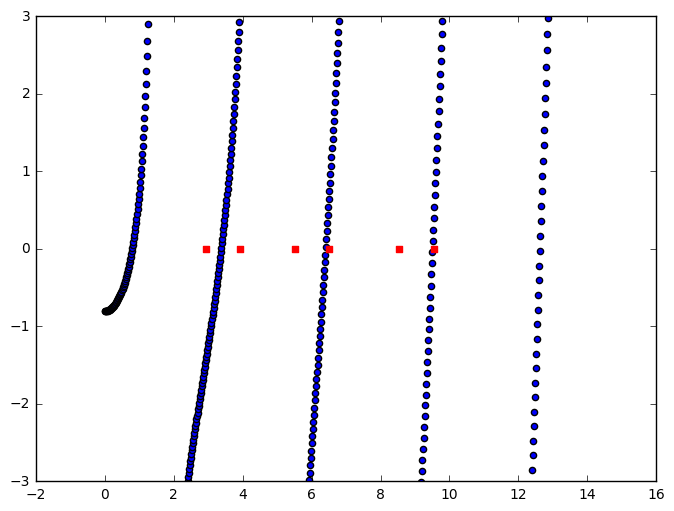

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    

x = np.linspace(0,15,1000)

f2 =np.vectorize(f)
#y= f(x)
axis.set_ylim(-3,3)
axis.scatter(x,f2(x))

axis.scatter(0.791+pi,0,color ='red', marker='s')
axis.scatter(0.791+pi-1,0,color ='red', marker='s')

axis.scatter(3.37+pi,0,color ='red', marker='s')
axis.scatter(3.37+pi-1,0,color ='red', marker='s')

axis.scatter(6.4+pi,0,color ='red', marker='s')
axis.scatter(6.4+pi-1,0,color ='red', marker='s')

In [5]:
#tentativa falsa posição
def ksi(n):
    ksi_vector = []
    eps = 1e-7
    
    a = 0.6
    b = 0.8
    xm = (a+b)/2
    
    for i in range(n):
        while (abs(f(xm)) > eps):            
            if (f(a)*f(xm) > 0):
                a = xm
                        
            if (f(a)*f(xm) < 0):
                b = xm
                
            xm = (a+b)/2
            
            
        ksi_vector.append(xm)
        b = xm+pi
        a = xm+pi -1
        xm = (a+b)/2
    return ksi_vector

    

In [35]:
mesh = 5
deltax = L/(mesh-1)

time = 250
deltat = 8000

In [36]:
#solução numérica

T = np.zeros((time,mesh))
M = rho * A * deltax
x_plot = np.zeros(mesh)

for volume in range(mesh):
    T[0,volume] = 20
    if volume>0:
        x_plot[volume] = x_plot[volume-1] +deltax

for t in range(1,time):
    for volume in range(mesh):        
    
        if volume == 0:
            ae = k*A/(deltax)
            ap = M/2*cp/deltat
            
            T[t,volume] = (ae*T[t-1,volume+1] + (ap-ae)*T[t-1,volume])/ap
            
        if (volume > 0) and (volume < mesh-1):
            ae = k*A/deltax
            aw = ae
            ap = M*cp/deltat
            
            T[t,volume] = (aw*T[t-1,volume-1] + ae*T[t-1,volume+1] +(ap-ae-aw)*T[t-1,volume])/ap
            
        if (volume == mesh-1):
            aw =k*A/deltax
            ap = M/2*cp/deltat
            b = h*A*T_infinito
            
            T[t,volume] = (aw*T[t-1,volume-1] +(ap-aw-h*A)*T[t-1,volume] + b)/ap
            
        

In [37]:
x_plot

array([ 0. ,  0.1,  0.2,  0.3,  0.4])

In [52]:
#solução analítica
T_analitico = np.zeros((time,mesh))

#for volume in range(mesh):
    #T_analitico[0,volume] = 20

N = 100 

ksi_n = ksi(N)

    
for t in range(time):
    for x in range(mesh):
        x_ad = x_plot[x]/L
        Fo = alpha*deltat*(t)/L**2
        soma =0
        
        #somatório
        for n in range(N):
            Cn = 4*sin(ksi_n[n])/(2*ksi_n[n] + sin(2*ksi_n[n]))
            soma = soma + Cn*exp(-(ksi_n[n]**2*Fo)) * cos(ksi_n[n]*x_ad)
            
        T_analitico[t,x] = soma*(Ti-T_infinito) +T_infinito
        
        
        
        

In [53]:
T_analitico

array([[ 20.00065534,  19.99934403,  20.00066218,  19.99930402,
         20.13033974],
       [ 20.00004426,  20.00283709,  20.11931881,  21.75686683,
         30.25067839],
       [ 20.0161837 ,  20.11148689,  20.89636654,  24.40240406,
         33.89558918],
       ..., 
       [ 98.15057164,  98.18661802,  98.29335202,  98.46661304,
         98.69964716],
       [ 98.17927779,  98.21476467,  98.31984198,  98.49041371,
         98.71983076],
       [ 98.20753838,  98.24247444,  98.34592078,  98.51384495,
         98.73970108]])

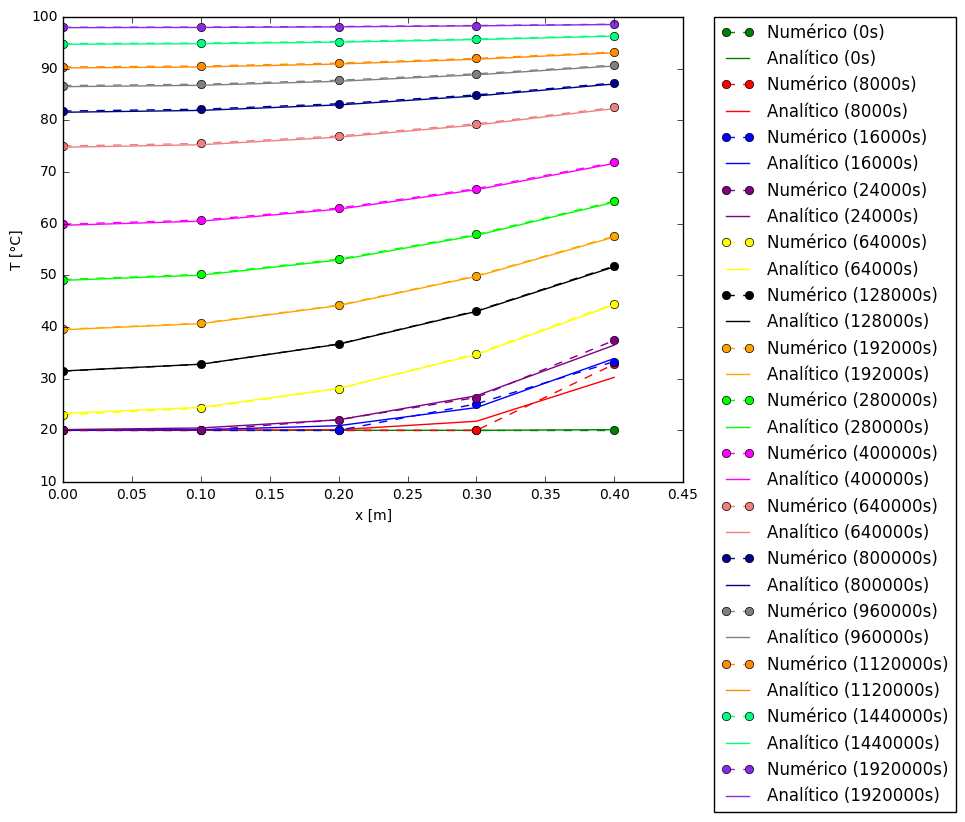

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)    

colors = [ 'green','red','blue','purple','yellow', 'black',  'orange', 'lime', 
          'magenta','lightcoral','darkblue', 'gray','darkorange','springgreen','blueviolet']
i=0
timelist = [0,1,2,3,8,16,24,35,50,80,100,120,140,180,240]
#timelist = [0,1,2,3,4]
for t in timelist:       
    axis.plot(x_plot, T[t],label='Numérico ('+str(t*deltat)+'s)',ls='--',marker='o',color = colors[i])
    #axis.scatter(x_plot, T_interpolacao, color ='blue',label='Interpolação')
    axis.plot(x_plot,T_analitico[t],color = colors[i],label='Analítico ('+str(t*deltat)+'s)')
    i+=1


axis.set_ylabel('T [°C]')
axis.set_xlabel('x [m]')
axis.set_title('')
axis.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axis.set_ylim(70,180)
#axis.set_xlim(0,90)


In [12]:
timelist = [0,1,2,3,8,16,24,35,50]
for t in timelist: 
    print(t)

0
1
2
3
8
16
24
35
50


In [14]:
len(T)

60